In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('../Files/fFinalClean.csv')



In [4]:
df.shape

(7451, 75)

In [5]:
df.isnull().sum().sum()

0

In [6]:
# eda_data.drop_duplicates(keep='first', inplace=True)
# eda_data.reset_index(drop=True,inplace=True)

In [7]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fbiography', 'fshort', 'fdrama', 'fcomedy', 'fnews',
       'fcrime', 'fadventure', 'fgame-show', 'ffantasy', 'fthriller',
       'fmystery', 'fromance', 'fwestern', 'fmusic', 'freality-tv',
       'fanimation', 'fadult', 'fsci-fi', 'ffamily', 'ftalk-show', 'fmusical',
       'fsport', 'fhistory', 'fhorror', 'fwar', 'faction', 'fdocumentary',
       'actW', 'nominated', 'Won', 'month', 'year', 'temp', 'genre_lables',
       'certificate_G', 'certificate_PG', 'certificate_PG-13', 'certificate_R',
       'certificate_Unrated', 'fproduction_Columbia Pictures',
       'fproduction_Dimension Films', 'fproduction_DreamWorks',
       'fproduction_Fox 2000 Pictures', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fpr

Tukeys method number of outliers is 545
90% confidence interval has 202 values between 99 and 100


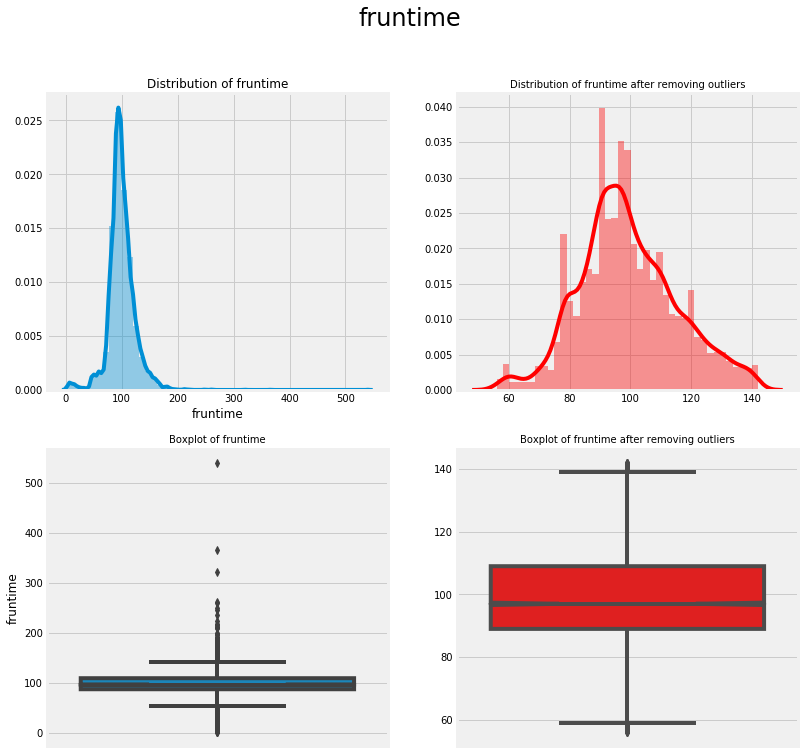

In [8]:
def no_outlier(Data_column,data_set):
    import math
    X = data_set[Data_column]
    no_outlier = []
    confidence = []
    
    q1 = float(X.describe()['25%'])
    q3 = float(X.describe()['75%'])
    iqr = (q3 - q1)*1.5
    std = float(X.describe()['std'])
    mean = float(X.describe()['mean'])
    lower_limit = mean-(1.645*(std/math.sqrt(len(X))))
    higher_limit = mean+(1.645*(std/math.sqrt(len(X))))
    
    for total in X:
        if lower_limit < total < higher_limit:
            confidence.append(total)
        
        if (q1 - iqr) < (total) < (q3 + iqr):
            no_outlier.append(total)
        else:
            pass
    print('Tukeys method number of outliers is {}'.format((len(X)-len(sorted(no_outlier)))))
    print('90% confidence interval has {} values between {} and {}'.format(len(sorted(confidence)),round(lower_limit),round(higher_limit)))
    
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
    sns.distplot(X, ax=ax[0,0])
    sns.distplot(no_outlier,color='red', ax=ax[0,1])
    sns.boxplot(X,notch=True,orient='v',ax=ax[1,0])
    sns.boxplot(no_outlier,notch=True,orient='v',color='red',ax=ax[1,1])
    
    fig.suptitle('{}'.format(Data_column), fontsize=24)
    ax[0,0].set_title('Distribution of {}'.format(Data_column), fontsize=12)
    ax[0,1].set_title('Distribution of {} after removing outliers'.format(Data_column), fontsize=10)
    ax[1,0].set_title('Boxplot of {}'.format(Data_column), fontsize=10)
    ax[1,1].set_title('Boxplot of {} after removing outliers'.format(Data_column), fontsize=10)
    
no_outlier('fruntime',df)

In [9]:
# genre = df[['fcomedy', 'fadult', 'fdocumentary', 'fmystery',
#        'fadventure', 'fbiography', 'fshort', 'fnews', 'fthriller', 'ffamily',
#        'fhistory', 'fcrime', 'fhorror', 'ftalk-show', 'fwar', 'fgame-show',
#        'freality-tv', 'fwestern', 'faction', 'fmusical', 'fsport', 'fmusic',
#        'fanimation', 'fromance', 'fsci-fi', 'ffantasy', 'fdrama']]
 
 
 
# certeficate = df[['certificate_Not Rated', 'certificate_PG',
#        'certificate_PG-13', 'certificate_R', 'certificate_Unrated']]
 
# production = df[['fproduction_Columbia Pictures', 'fproduction_Dimension Films',
#        'fproduction_DreamWorks', 'fproduction_Fox 2000 Pictures',
#        'fproduction_Fox Searchlight Pictures', 'fproduction_Lionsgate',
#        'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
#        'fproduction_Screen Gems', 'fproduction_Summit Entertainment',
#        'fproduction_Touchstone Pictures', 'fproduction_Twentieth Century Fox',
#        'fproduction_Universal Pictures', 'fproduction_Walt Disney Pictures',
#        'fproduction_Warner Bros', 'fproduction_other']]

### Genre

In [10]:
df[['fruntime','fimdb_rating','fimdb_votes']]

,fruntime,fimdb_rating,fimdb_votes
0,118.000000,6.4,75402.0
1,104.000000,2.2,20967.0
2,98.000000,8.1,110024.0
3,89.000000,5.8,3847.0
4,98.000000,7.6,16232.0
...,...,...,...
7446,91.256240,0.0,0.0
7447,96.817996,0.0,0.0
7448,108.000000,5.0,263.0
7449,76.000000,0.0,0.0


In [11]:
df.rename(columns = {'fsci-fi':'fsci_fi','freality-tv':'freality_tv','fgame-show':'fgame_show','ftalk-show':'ftalk_show'},inplace = True)

In [12]:
 genre = df[['fcomedy', 'fadult', 'fdocumentary', 'fmystery',
        'fadventure', 'fbiography', 'fshort', 'fnews', 'fthriller', 'ffamily',
        'fhistory', 'fcrime', 'fhorror', 'ftalk_show', 'fwar', 'fgame_show',
        'freality_tv', 'fwestern', 'faction', 'fmusical', 'fsport', 'fmusic',
        'fanimation', 'fromance', 'fsci_fi', 'ffantasy', 'fdrama']]

In [14]:
import collections 

genre_sum = []
genre_count = []
mul_list_dict = collections.defaultdict(list)
for i in range(0,df.shape[0]):
    counter_sum = 0
    counter_freq = 0
    for j in genre.columns:
        if df[j][i] != 0:
            a = str(df[j])
            counter_sum+= df['rating'][i] * df[j][i]
            counter_freq+= 1
            mul_list_dict['{}_budget'.format(j)].append(df['fbudget_y'][i])
            mul_list_dict['{}_Gross'.format(j)].append(df['fGross_y'][i])
            mul_list_dict['{}_cumlative'.format(j)].append(df['fcumlative_y'][i])
            
              
    genre_sum.append(counter_sum)
    genre_count.append(counter_freq)
        
df['total_genre_bud'] = genre_sum
df['count_genres'] = genre_count


genre_title = []
genre_budget = []
genre_Gross = []
genre_cumilative = []



for i in genre:
    
    genre_title.append(i)
    genre_budget.append(int((sum(mul_list_dict['{}_budget'.format(i)]))/(len(mul_list_dict['{}_budget'.format(i)]))))
    genre_Gross.append(int((sum(mul_list_dict['{}_Gross'.format(i)]))/(len(mul_list_dict['{}_Gross'.format(i)]))))
    genre_cumilative.append(int((sum(mul_list_dict['{}_cumlative'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)]))))
    
    print('{}'.format(i), 'has an average budget of :'\
          , (sum(mul_list_dict['{}_budget'.format(i)]))/(len(mul_list_dict['{}_budget'.format(i)])))
    
    print('{}'.format(i), 'has an average Gross of :'\
          , (sum(mul_list_dict['{}_Gross'.format(i)]))/(len(mul_list_dict['{}_Gross'.format(i)])))
    
    print('{}'.format(i), 'has an average cumlative of :'\
          , (sum(mul_list_dict['{}_cumlative'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)])))
    
    print('\n')
    

    

    
    
genre_specs = pd.DataFrame({'Genre':genre_title,'budget_avg':genre_budget,'Gross_avg':genre_Gross,'cumilative_avg':genre_cumilative})

    

fcomedy has an average budget of : 28279315.945070993
fcomedy has an average Gross of : 163101484.09327576
fcomedy has an average cumlative of : 54450251.962948985


fadult has an average budget of : 165641.84285714285
fadult has an average Gross of : 60904911.5
fadult has an average cumlative of : 165641.84285714285


fdocumentary has an average budget of : 3388030.2885714285
fdocumentary has an average Gross of : 235644299.0571428
fdocumentary has an average cumlative of : 1453544.3914285717


fmystery has an average budget of : 31630478.373932272
fmystery has an average Gross of : 140818566.6565535
fmystery has an average cumlative of : 58361842.72886598


fadventure has an average budget of : 74879881.20944148
fadventure has an average Gross of : 140598180.4146276
fadventure has an average cumlative of : 223605558.30079797


fbiography has an average budget of : 30614757.64336283
fbiography has an average Gross of : 76152931.63274334
fbiography has an average cumlative of : 4690927

In [ ]:
import collections 

genre_sum = []
genre_count = []
mul_list_dict = collections.defaultdict(list)
for i in range(0,df.shape[0]):
    counter_sum = 0
    counter_freq = 0
    for j in genre.columns:
        if df[j][i] != 0:
            a = str(df[j])
            counter_sum+= df['rating'][i] * df[j][i]
            counter_freq+= 1
            mul_list_dict['{}_budget'.format(j)].append(df['fbudget_y'][i])
            mul_list_dict['{}_Gross'.format(j)].append(df['fGross_y'][i])
            mul_list_dict['{}_cumlative'.format(j)].append(df['fcumlative_y'][i])
            
              
    genre_sum.append(counter_sum)
    genre_count.append(counter_freq)
        
df['total_genre_bud'] = genre_sum
df['count_genres'] = genre_count


genre_title = []
genre_budget = []
genre_Gross = []
genre_cumilative = []



for i in genre:
    
    genre_title.append(i)
    genre_budget.append(int((sum(mul_list_dict['{}_budget'.format(i)]))/(len(mul_list_dict['{}_budget'.format(i)]))))
    genre_Gross.append(int((sum(mul_list_dict['{}_Gross'.format(i)]))/(len(mul_list_dict['{}_Gross'.format(i)]))))
    genre_cumilative.append(int((sum(mul_list_dict['{}_cumlative'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)]))))
    
    print('{}'.format(i), 'has an average budget of :'\
          , (sum(mul_list_dict['{}_budget'.format(i)]))/(len(mul_list_dict['{}_budget'.format(i)])))
    
    print('{}'.format(i), 'has an average Gross of :'\
          , (sum(mul_list_dict['{}_Gross'.format(i)]))/(len(mul_list_dict['{}_Gross'.format(i)])))
    
    print('{}'.format(i), 'has an average cumlative of :'\
          , (sum(mul_list_dict['{}_cumlative'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)])))
    
    print('\n')
    

    

    
    
genre_specs = pd.DataFrame({'Genre':genre_title,'budget_avg':genre_budget,'Gross_avg':genre_Gross,'cumilative_avg':genre_cumilative})

    

In [15]:
df['total_genre_bud']

0       19.2
1        6.6
2       16.2
3       11.6
4       15.2
        ... 
7446     0.0
7447     0.0
7448    20.0
7449     0.0
7450     0.0
Name: total_genre_bud, Length: 7451, dtype: float64

In [15]:
genre_specs

,Genre,budget_avg,Gross_avg,cumilative_avg
0,fcomedy,28279315,163101484,54450251
1,fadult,165641,60904911,165641
2,fdocumentary,3388030,235644299,1453544
3,fmystery,31630478,140818566,58361842
4,fadventure,74879881,140598180,223605558
5,fbiography,30614757,76152931,46909275
6,fshort,1207353,123699478,1460579
7,fnews,480274,172329559,79533
8,fthriller,31876340,162792416,55738834
9,ffamily,57997596,168526599,172445953


In [16]:
genre_specs.set_index(['Genre'],inplace=True)
genre_specs.head()

,budget_avg,Gross_avg,cumilative_avg
Genre,,,
fcomedy,28279315,163101484,54450251
fadult,165641,60904911,165641
fdocumentary,3388030,235644299,1453544
fmystery,31630478,140818566,58361842
fadventure,74879881,140598180,223605558


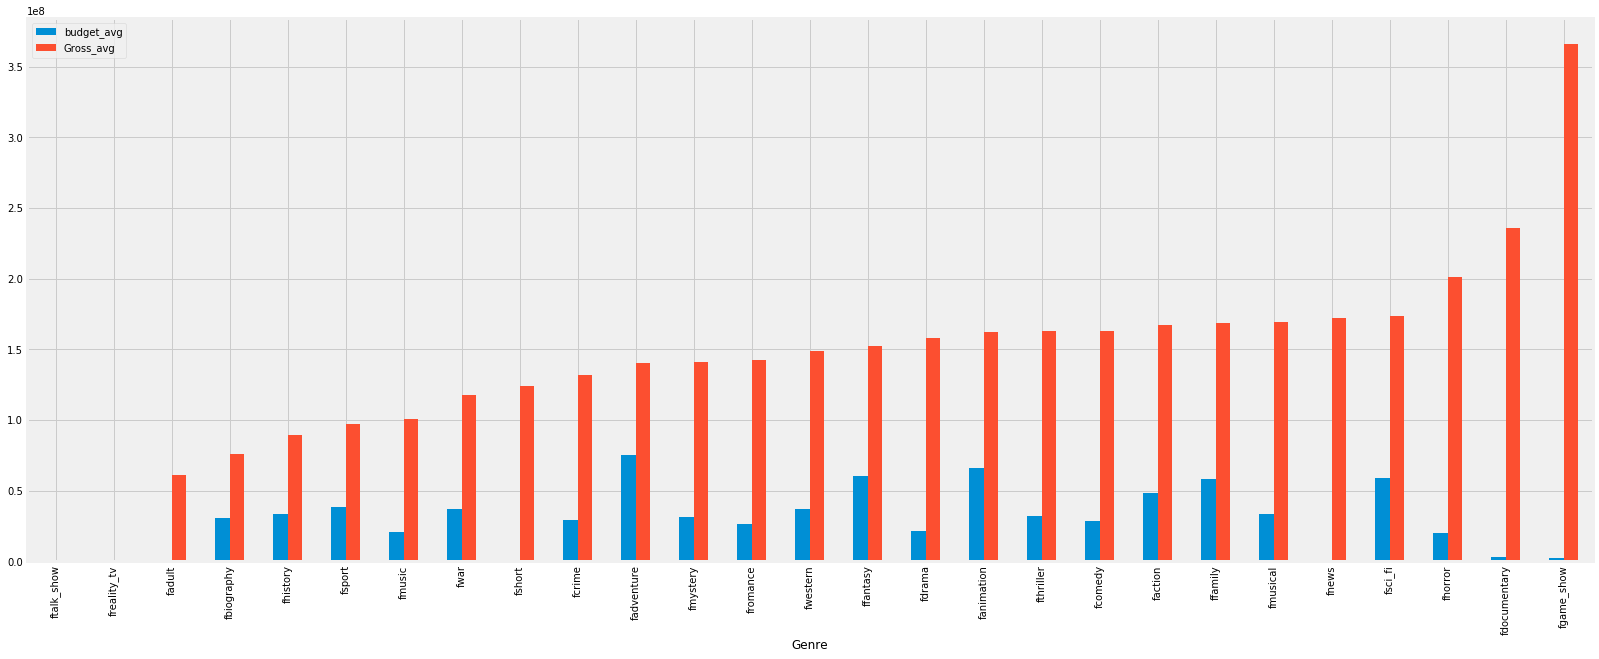

In [17]:
genre_specs[['budget_avg','Gross_avg']].sort_values(by=['Gross_avg']).plot(kind='bar',figsize=(25,10))

## Month

In [18]:
df['month'].value_counts()


Sep    1318
Oct     744
Nov     620
Mar     588
Apr     572
Jan     571
Dec     557
Aug     539
May     501
Jun     499
Feb     484
Jul     458
Name: month, dtype: int64

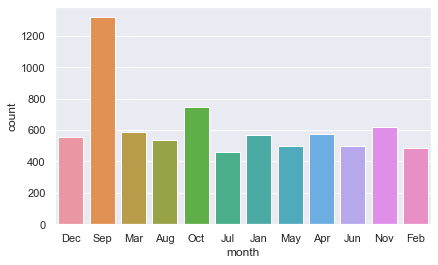

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="month", data=df)

In [20]:
grouped_months = df.groupby('month') 

In [27]:
grouped_months['fGross_y'].mean()

month
Apr    1.675009e+08
Aug    1.452824e+08
Dec    1.804129e+08
Feb    1.862069e+08
Jan    1.491992e+08
Jul    1.691119e+08
Jun    1.762155e+08
Mar    1.706489e+08
May    1.743401e+08
Nov    1.795454e+08
Oct    1.740151e+08
Sep    1.656526e+08
Name: fGross_y, dtype: float64

In [26]:
grouped_months['fbudget_y'].mean()

month
Apr    2.107272e+07
Aug    2.629520e+07
Dec    3.060781e+07
Feb    2.380189e+07
Jan    2.044696e+07
Jul    3.291793e+07
Jun    3.398071e+07
Mar    2.711430e+07
May    3.401445e+07
Nov    2.945964e+07
Oct    2.052527e+07
Sep    1.120684e+07
Name: fbudget_y, dtype: float64

In [25]:
grouped_months['fcumlative_y'].mean()

month
Apr    2.903701e+07
Aug    4.122466e+07
Dec    7.958437e+07
Feb    4.078167e+07
Jan    3.506511e+07
Jul    8.900696e+07
Jun    8.158555e+07
Mar    4.830940e+07
May    7.772948e+07
Nov    7.065104e+07
Oct    3.095634e+07
Sep    1.487813e+07
Name: fcumlative_y, dtype: float64

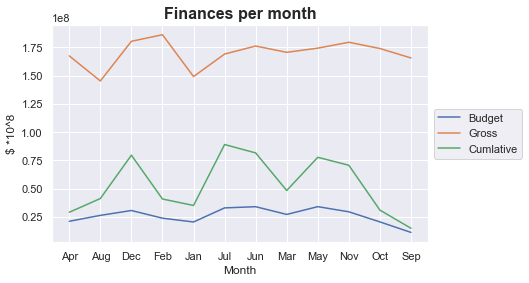

In [35]:
plt.plot(grouped_months['fbudget_y'].mean(), label="Budget")
plt.plot(grouped_months['fGross_y'].mean(), label="Gross")
plt.plot(grouped_months['fcumlative_y'].mean(), label="Cumlative")
# Add legend
#plt.legend(loc='lower left')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Add title and x, y labels
plt.title("Finances per month", fontsize=16, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("$ *10^8")
plt.show()

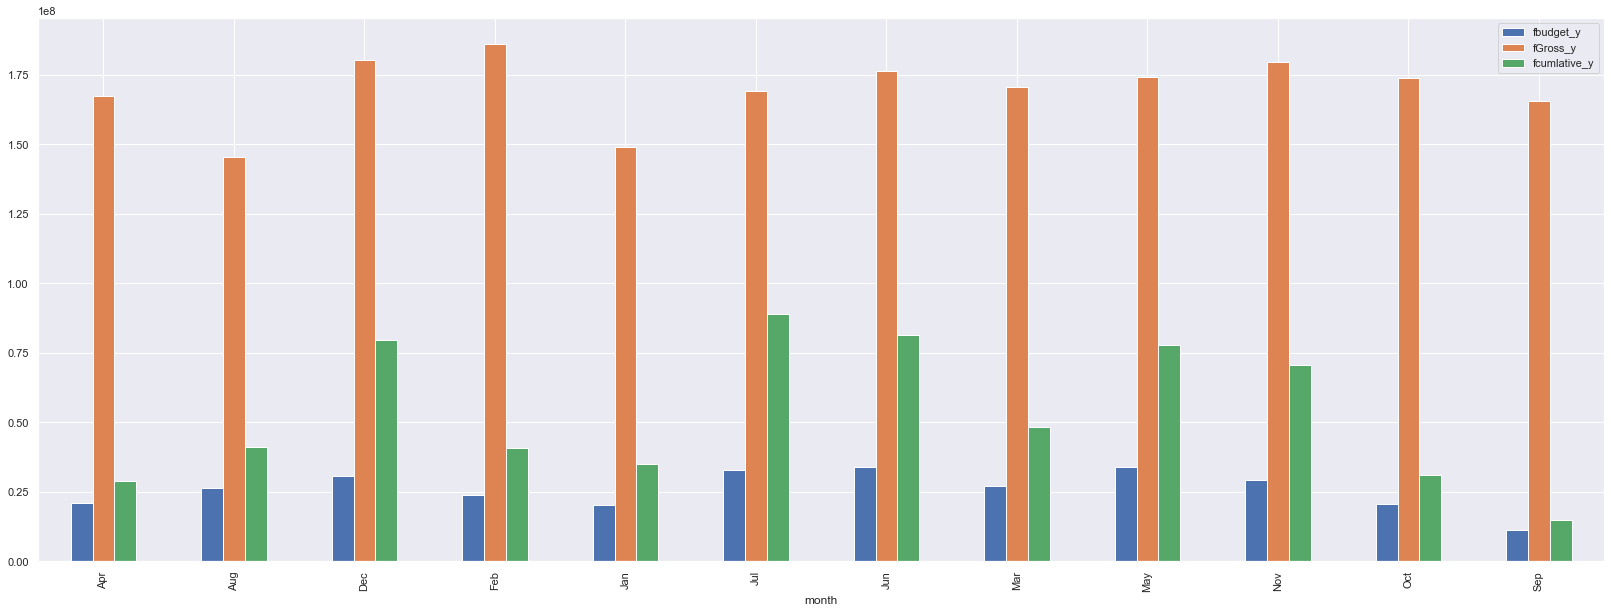

In [40]:
grouped_months[['fbudget_y','fGross_y','fcumlative_y']].mean().plot(kind='bar',figsize=(25,10))

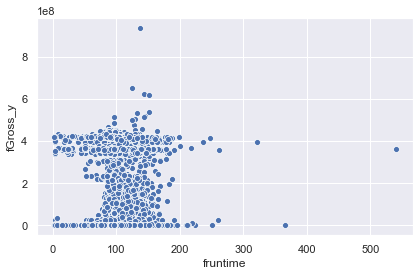

In [43]:
sns.scatterplot(x='fruntime',y='fGross_y',data=df)

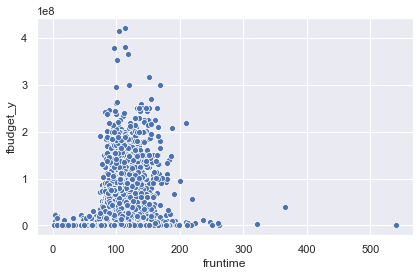

In [42]:
sns.scatterplot(x='fruntime',y='fbudget_y',data=df)

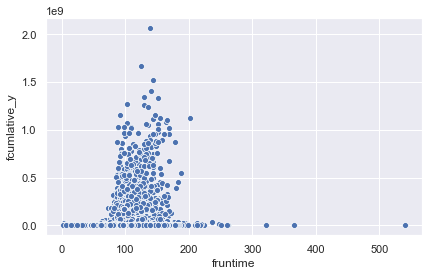

In [44]:
sns.scatterplot(x='fruntime',y='fcumlative_y',data=df)

In [47]:
certeficate = df[['certificate_G','certificate_PG','certificate_PG-13', 'certificate_R', 'certificate_Unrated']]

In [52]:
def dummy_finances(df,array):
    import collections
    
    mul_list_dict = collections.defaultdict(list)
    
    for i in range(0,df.shape[0]):
        for j in array.columns:
            if df[j][i] != 0:
                a = str(df[j])
                mul_list_dict['{}_budget'.format(j)].append(df['fbudget_y'][i])
                mul_list_dict['{}_Gross'.format(j)].append(df['fGross_y'][i])
                mul_list_dict['{}_cumlative'.format(j)].append(df['fcumlative_y'][i])
                
                
    genre_title = []
    genre_budget = []
    genre_Gross = []
    genre_cumilative = []
    
    for i in array:
        genre_title.append(i)
        genre_budget.append(int((sum(mul_list_dict['{}_budget'.format(i)]))/(len(mul_list_dict['{}_budget'.format(i)]))))
        genre_Gross.append(int((sum(mul_list_dict['{}_Gross'.format(i)]))/(len(mul_list_dict['{}_Gross'.format(i)]))))
        genre_cumilative.append(int((sum(mul_list_dict['{}_cumlative'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)]))))
    
    
    return pd.DataFrame({'Genre':genre_title,'budget_avg':genre_budget,'Gross_avg':genre_Gross,'cumilative_avg':genre_cumilative})

    

In [22]:
def dummy_finances(df,array):
    import collections
    
    mul_list_dict = collections.defaultdict(list)
    rating = []
    runtime = []
    imdb_votes = []
    
    for i in range(0,df.shape[0]):
        for j in array.columns:
            if df[j][i] != 0:
                a = str(df[j])
                mul_list_dict['{}_budget'.format(j)].append(df['fbudget_y'][i])
                mul_list_dict['{}_Gross'.format(j)].append(df['fGross_y'][i])
                mul_list_dict['{}_cumlative'.format(j)].append(df['fcumlative_y'][i])
                mul_list_dict['{}_fimdb_rating'.format(j)].append(df['fimdb_rating'][i])
                mul_list_dict['{}_runtime'.format(j)].append(df['fruntime'][i])
                mul_list_dict['{}_imdb_votes'.format(j)].append(df['fimdb_votes'][i])
                
                
    genre_title = []
    genre_budget = []
    genre_Gross = []
    genre_cumilative = []
    frating = []
    fruntime = []
    fvotes = []
    
    for i in array:
        genre_title.append(i)
        genre_budget.append(int((sum(mul_list_dict['{}_budget'.format(i)]))/(len(mul_list_dict['{}_budget'.format(i)]))))
        genre_Gross.append(int((sum(mul_list_dict['{}_Gross'.format(i)]))/(len(mul_list_dict['{}_Gross'.format(i)]))))
        genre_cumilative.append(int((sum(mul_list_dict['{}_cumlative'.format(i)]))/(len(mul_list_dict['{}_cumlative'.format(i)]))))
        frating.append(int((sum(mul_list_dict['{}_fimdb_rating'.format(i)]))/(len(mul_list_dict['{}_fimdb_rating'.format(i)]))))
        fruntime.append(int((sum(mul_list_dict['{}_runtime'.format(i)]))/(len(mul_list_dict['{}_runtime'.format(i)]))))
        fvotes.append(int((sum(mul_list_dict['{}_imdb_votes'.format(i)]))/(len(mul_list_dict['{}_imdb_votes'.format(i)]))))
       
        
    
    
    return pd.DataFrame({'Genre':genre_title,'budget_avg':genre_budget,'Gross_avg':genre_Gross,'cumilative_avg':genre_cumilative,\
                        'fimdb_rating':frating,'runtime':fruntime,'votes':fvotes})

    

In [23]:
dummy_finances(df,genre)

,Genre,budget_avg,Gross_avg,cumilative_avg,fimdb_rating,runtime,votes
0,fcomedy,28279315,163101484,54450251,5,97,45844
1,fadult,165641,60904911,165641,1,103,2
2,fdocumentary,3388030,235644299,1453544,4,59,1220
3,fmystery,31630478,140818566,58361842,5,102,76080
4,fadventure,74879881,140598180,223605558,6,106,150021
5,fbiography,30614757,76152931,46909275,6,114,82357
6,fshort,1207353,123699478,1460579,2,29,57
7,fnews,480274,172329559,79533,3,55,14
8,fthriller,31876340,162792416,55738834,5,102,74159
9,ffamily,57997596,168526599,172445953,5,96,75709


In [16]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fbiography', 'fshort', 'fdrama', 'fcomedy', 'fnews',
       'fcrime', 'fadventure', 'fgame_show', 'ffantasy', 'fthriller',
       'fmystery', 'fromance', 'fwestern', 'fmusic', 'freality_tv',
       'fanimation', 'fadult', 'fsci_fi', 'ffamily', 'ftalk_show', 'fmusical',
       'fsport', 'fhistory', 'fhorror', 'fwar', 'faction', 'fdocumentary',
       'actW', 'nominated', 'Won', 'month', 'year', 'temp', 'genre_lables',
       'certificate_G', 'certificate_PG', 'certificate_PG-13', 'certificate_R',
       'certificate_Unrated', 'fproduction_Columbia Pictures',
       'fproduction_Dimension Films', 'fproduction_DreamWorks',
       'fproduction_Fox 2000 Pictures', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fpr

In [55]:
dummy_finances(df,certeficate)

,Genre,budget_avg,Gross_avg,cumilative_avg
0,certificate_G,55273250,178066542,157902058
1,certificate_PG,51386287,150433570,147602406
2,certificate_PG-13,48321223,121913852,122082162
3,certificate_R,16620812,168924834,21866300
4,certificate_Unrated,9242733,229442086,5657248


In [56]:
certeficate_info = dummy_finances(df,certeficate)

In [58]:
certeficate_info.set_index(['Genre'],inplace=True)
certeficate_info.head()

,budget_avg,Gross_avg,cumilative_avg
Genre,,,
certificate_G,55273250,178066542,157902058
certificate_PG,51386287,150433570,147602406
certificate_PG-13,48321223,121913852,122082162
certificate_R,16620812,168924834,21866300
certificate_Unrated,9242733,229442086,5657248


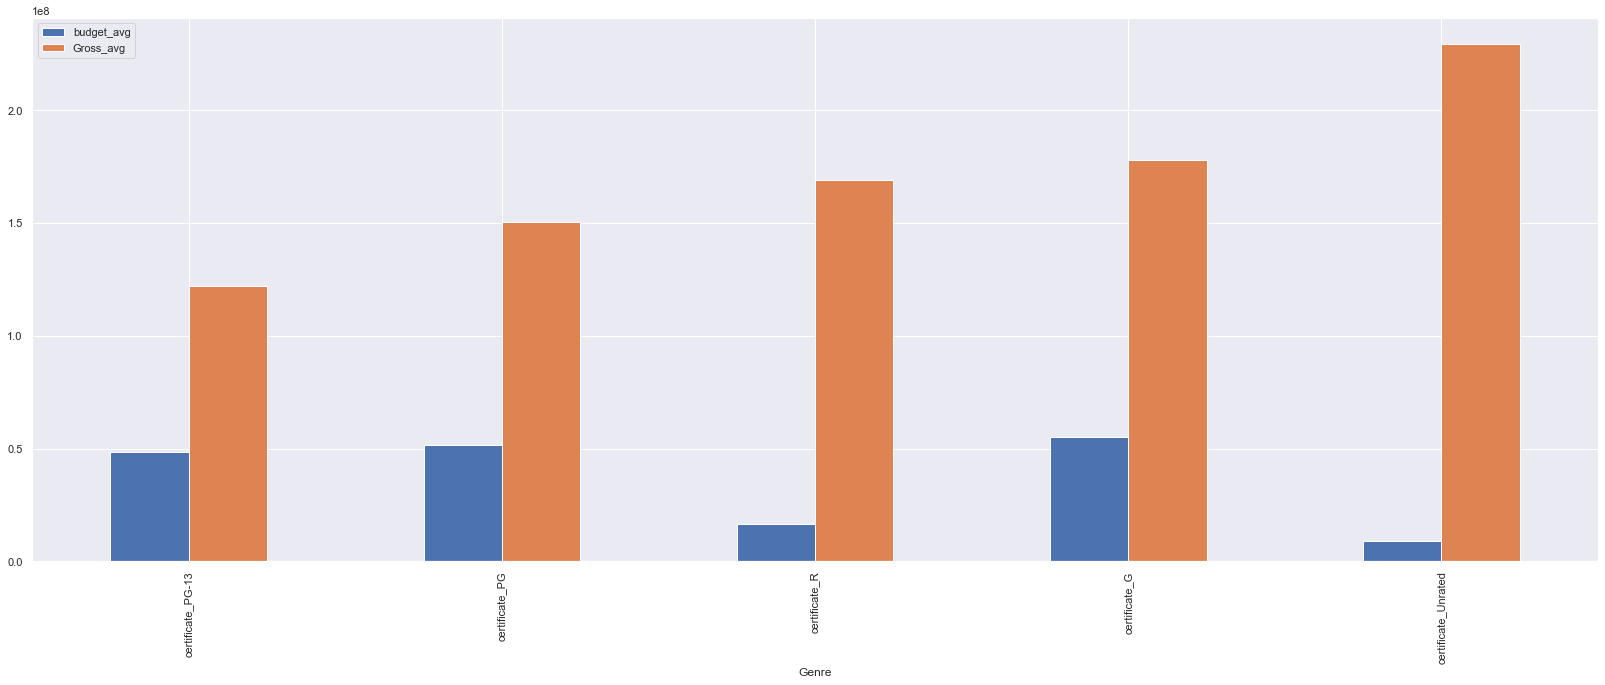

In [59]:
certeficate_info[['budget_avg','Gross_avg']].sort_values(by=['Gross_avg']).plot(kind='bar',figsize=(25,10))

In [67]:
production = df[['fproduction_Columbia Pictures', 'fproduction_Dimension Films',
        'fproduction_DreamWorks', 'fproduction_Fox 2000 Pictures',
        'fproduction_Fox Searchlight Pictures', 'fproduction_Lionsgate',
        'fproduction_New Line Cinema', 'fproduction_Paramount Pictures',
        'fproduction_Screen Gems', 'fproduction_Summit Entertainment',
        'fproduction_Touchstone Pictures', 'fproduction_Twentieth Century Fox',
        'fproduction_Universal Pictures', 'fproduction_Walt Disney Pictures',
        'fproduction_Warner Bros']] #'fproduction_other'

In [68]:
production_info = dummy_finances(df,production)

In [69]:
production_info.head()

,Genre,budget_avg,Gross_avg,cumilative_avg
0,fproduction_Columbia Pictures,67572680,81563927,185374778
1,fproduction_Dimension Films,55309258,66196309,64047766
2,fproduction_DreamWorks,48194000,55784087,115694131
3,fproduction_Fox 2000 Pictures,48038210,61528210,140383477
4,fproduction_Fox Searchlight Pictures,31386392,27796918,56317050


In [70]:
production_info.set_index(['Genre'],inplace=True)
production_info.head()

,budget_avg,Gross_avg,cumilative_avg
Genre,,,
fproduction_Columbia Pictures,67572680,81563927,185374778
fproduction_Dimension Films,55309258,66196309,64047766
fproduction_DreamWorks,48194000,55784087,115694131
fproduction_Fox 2000 Pictures,48038210,61528210,140383477
fproduction_Fox Searchlight Pictures,31386392,27796918,56317050


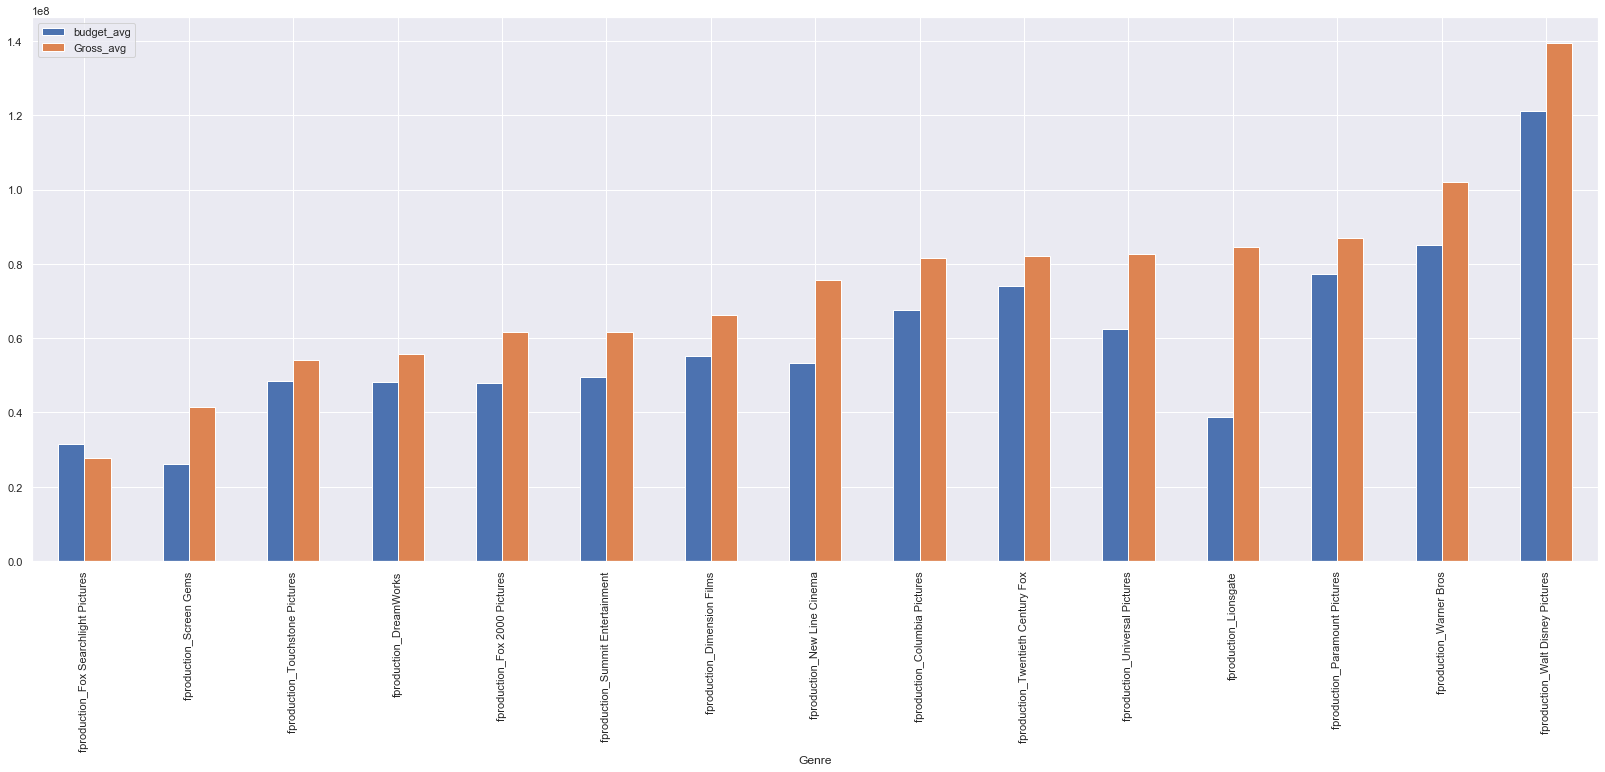

In [71]:
production_info[['budget_avg','Gross_avg']].sort_values(by=['Gross_avg']).plot(kind='bar',figsize=(25,10))

In [151]:
df.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fbiography', 'fshort', 'fdrama', 'fcomedy', 'fnews',
       'fcrime', 'fadventure', 'fgame_show', 'ffantasy', 'fthriller',
       'fmystery', 'fromance', 'fwestern', 'fmusic', 'freality_tv',
       'fanimation', 'fadult', 'fsci_fi', 'ffamily', 'ftalk_show', 'fmusical',
       'fsport', 'fhistory', 'fhorror', 'fwar', 'faction', 'fdocumentary',
       'actW', 'nominated', 'Won', 'month', 'year', 'temp', 'genre_lables',
       'certificate_G', 'certificate_PG', 'certificate_PG-13', 'certificate_R',
       'certificate_Unrated', 'fproduction_Columbia Pictures',
       'fproduction_Dimension Films', 'fproduction_DreamWorks',
       'fproduction_Fox 2000 Pictures', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fpr

### Production companies

In [124]:
prod_comp = eda_data[eda_data['production'] != 'other']
prod_count = prod_comp['fproduction'].value_counts().sort_index()
df_gCount = pd.DataFrame({'production': prod_count.index, 'count': prod_count.values})
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'count', y = 'production', data=df_gCount)
ax.set_title('.: occurences per production coumpany :.')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()


KeyError: 'production'

In [34]:
prod_comp = eda_data[eda_data['fproduction'] != 'other']

In [39]:
category_financial = prod_comp[['fGross_y','fbudget_y','fcumlative_y']].groupby(prod_comp['fproduction'])
financial_df=pd.DataFrame(category_financial.sum())
sorted_profit=financial_df.sort_values('fcumlative_y',ascending=False)
sorted_profit.head()

,fGross_y,fbudget_y,fcumlative_y
fproduction,,,
Warner Bros,1.382027e+10,1.147198e+10,3.298980e+10
Universal Pictures,1.246194e+10,8.939609e+09,2.753658e+10
Columbia Pictures,1.117426e+10,9.131980e+09,2.539634e+10
Paramount Pictures,9.730897e+09,8.461544e+09,2.289875e+10
Walt Disney Pictures,8.503322e+09,7.182500e+09,2.188072e+10


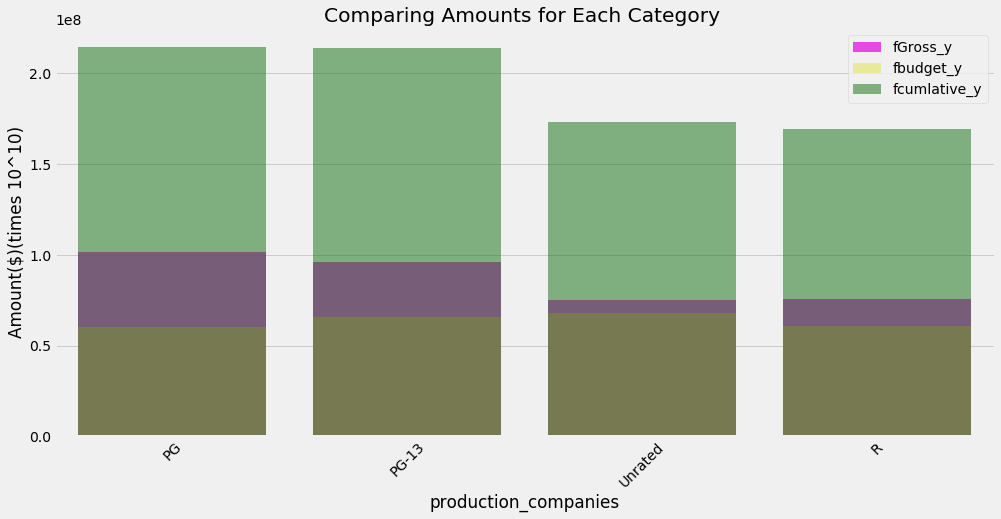

In [100]:
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=sorted_profit.index, y=sorted_profit['fGross_y'],color='magenta',alpha = 0.8,label='fGross_y')
sns.barplot(x=sorted_profit.index, y=sorted_profit['fbudget_y'],color='yellow',alpha = 0.4,label='fbudget_y')
sns.barplot(x=sorted_profit.index, y=sorted_profit['fcumlative_y'],color='green',alpha = 0.5,label='fcumlative_y')
plt.xticks(rotation= 45)
ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='certification', ylabel='Amount($)(times 10^10)',title = "Comparing Amounts for Each Category ")
plt.show()

In [129]:
eda_data['certification'].isnull().sum()

7297

### Certificates

In [126]:
eda_data['certification'].value_counts()

R          82
PG-13      35
Unrated    27
PG         10
Name: certification, dtype: int64

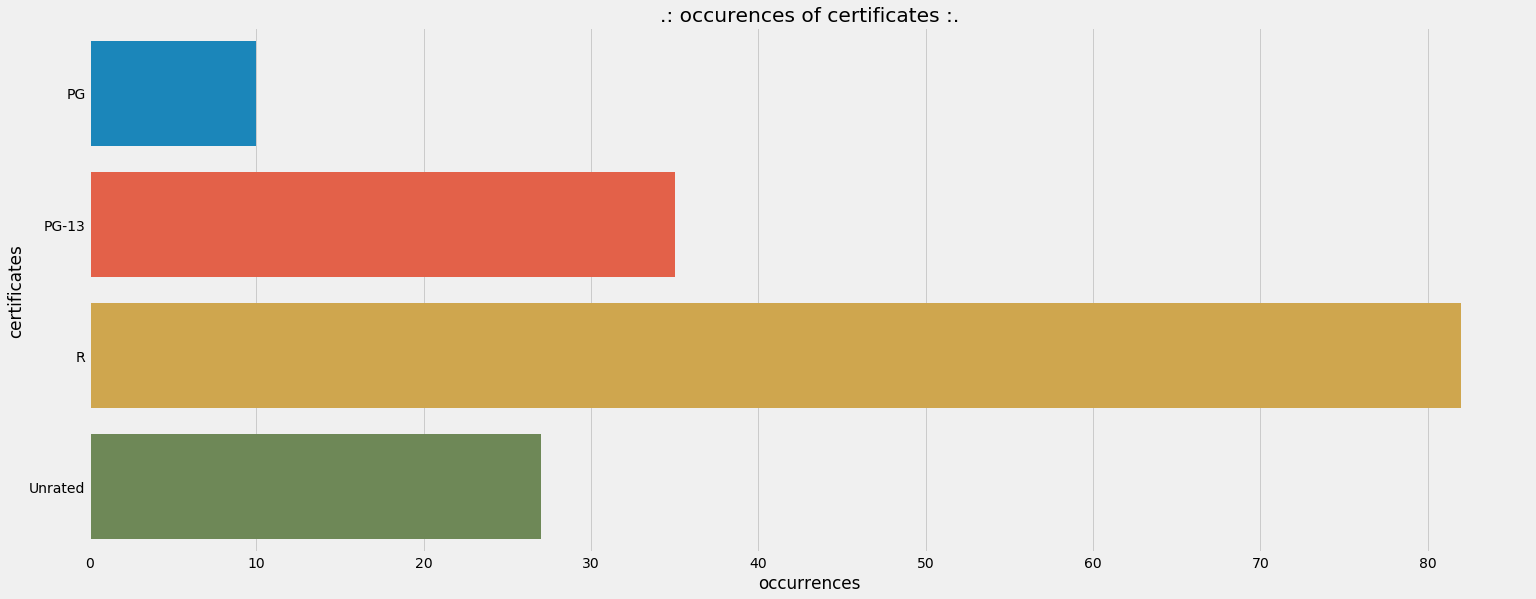

In [128]:
prod_count = eda_data['certification'].value_counts().sort_index()
df_gCount = pd.DataFrame({'production': prod_count.index, 'count': prod_count.values})
f, ax = plt.subplots(figsize=(23, 9))
sns.barplot(x = 'count', y = 'production', data=df_gCount)
ax.set_title('.: occurences of certificates :.')
ax.set_xlabel('occurrences')
ax.set_ylabel('certificates')
plt.show()


In [98]:
category_financial = prod_comp[['fGross_y','fbudget_y','fcumlative_y']].groupby(eda_data['certificate'])
financial_df=pd.DataFrame(category_financial.mean())
sorted_profit=financial_df.sort_values('fcumlative_y',ascending=False)
sorted_profit.head()

,fGross_y,fbudget_y,fcumlative_y
certificate,,,
PG,1.016445e+08,6.007241e+07,2.143133e+08
PG-13,9.581557e+07,6.571548e+07,2.141599e+08
Unrated,7.518681e+07,6.796296e+07,1.730967e+08
R,7.542871e+07,6.080381e+07,1.694135e+08


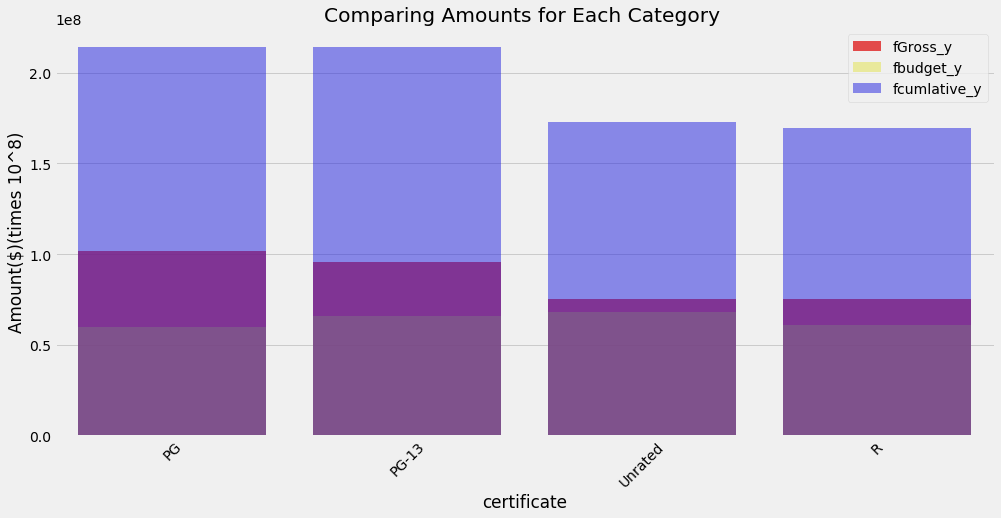

In [99]:
f,ax = plt.subplots(figsize = (15,7))
sns.barplot(x=sorted_profit.index, y=sorted_profit['fGross_y'],color='red',alpha = 0.8,label='fGross_y')
sns.barplot(x=sorted_profit.index, y=sorted_profit['fbudget_y'],color='yellow',alpha = 0.4,label='fbudget_y')
sns.barplot(x=sorted_profit.index, y=sorted_profit['fcumlative_y'],color='blue',alpha = 0.5,label='fcumlative_y')
plt.xticks(rotation= 45)
ax.legend(loc='upper right',frameon = True)
ax.set(xlabel='certificate', ylabel='Amount($)(times 10^8)',title = "Comparing Amounts for Each Category ")
plt.show()

In [84]:
eda_data.columns

Index(['fid', 'fname', 'fruntime', 'fimdb_rating', 'fimdb_votes', 'fimd',
       'fdirector', 'fwriter', 'fassistant_directors', 'fcinematographers',
       'fcomposers', 'feditors', 'fproducer', 'fenglish', 'fmulti_lang', 'fus',
       'fmulti_country', 'fcomedy', 'fadult', 'fdocumentary', 'fmystery',
       'fadventure', 'fbiography', 'fshort', 'fnews', 'fthriller', 'ffamily',
       'fhistory', 'fcrime', 'fhorror', 'ftalk-show', 'fwar', 'fgame-show',
       'freality-tv', 'fwestern', 'faction', 'fmusical', 'fsport', 'fmusic',
       'fanimation', 'fromance', 'fsci-fi', 'ffantasy', 'fdrama', 'actW',
       'nominated', 'Won', 'month', 'year', 'certificate_Not Rated',
       'certificate_PG', 'certificate_PG-13', 'certificate_R',
       'certificate_Unrated', 'fproduction_Columbia Pictures',
       'fproduction_Dimension Films', 'fproduction_DreamWorks',
       'fproduction_Fox 2000 Pictures', 'fproduction_Fox Searchlight Pictures',
       'fproduction_Lionsgate', 'fproduction_New Lin

In [33]:
production_comp.first() 

,fid,fname,fruntime,fimdb_rating,fimdb_votes,fimd,fdirector,fwriter,fassistant_directors,fcinematographers,...,fproduction_Walt Disney Pictures,fproduction_Warner Bros,fproduction_other,fGross_y,fbudget_y,fcumlative_y,fgenre,temp,genre_lables,certificate
fproduction,,,,,,,,,,,,,,,,,,,,,
Columbia Pictures,tt0172156,Bad Boys II,6.6,6.6,210984.0,0.66,0.0,0.0,0.0,0.5,...,0,0,0,138608444.0,130000000.0,273339556.0,"['Action', 'Comedy', 'Crime', 'Thriller']",100000001001000000100000000,23,R
Dimension Films,tt0160399,Impostor,6.2,6.2,21940.0,0.62,0.0,0.0,1.5,2.0,...,0,0,0,6285176.0,30000000.0,8694320.0,"['Drama', 'Mystery', 'Sci-Fi', 'Thriller']",000100001000000000000000101,9,R
DreamWorks,tt0165982,Sinbad: Legend of the Seven Seas,6.7,6.7,45888.0,0.67,0.0,1.0,0.0,0.0,...,0,0,0,26483452.0,60000000.0,80767884.0,"['Animation', 'Adventure', 'Family', 'Fantasy']",000010000100000000000010010,28,PG
Fox 2000 Pictures,tt0244970,Someone Like You...,6.1,6.1,22469.0,0.61,0.0,0.0,0.0,1.0,...,0,0,0,27343067.0,23000000.0,38689940.0,"['Comedy', 'Romance']",100000000000000000000001000,4,PG-13
Fox Searchlight Pictures,tt0243017,Waking Life,7.8,7.8,58009.0,0.78,0.0,1.0,0.0,1.0,...,0,0,0,2901447.0,28550000.0,3176880.0,"['Animation', 'Drama', 'Fantasy']",000000000000000000000010011,0,R
Lionsgate,tt0381849,3:10 to Yuma,7.7,7.7,274456.0,0.77,0.0,0.0,0.0,1.0,...,0,0,0,53606916.0,55000000.0,70016220.0,"['Action', 'Crime', 'Drama', 'Western']",000000000001000001100000001,20,R
New Line Cinema,tt0120737,The Lord of the Rings: The Fellowship of the Ring,8.8,8.8,1551084.0,0.88,0.0,0.0,0.0,1.0,...,0,0,0,315544750.0,93000000.0,872491916.0,"['Adventure', 'Drama', 'Fantasy']",000010000000000000000000011,28,PG
Paramount Pictures,tt0146316,Lara Croft: Tomb Raider,5.8,5.8,189189.0,0.58,0.0,0.0,0.0,0.0,...,0,0,0,131168070.0,115000000.0,274703340.0,"['Action', 'Adventure', 'Fantasy', 'Thriller']",000010001000000000100000010,7,PG-13
Screen Gems,tt0228333,Ghosts of Mars,4.9,4.9,49007.0,0.49,0.0,0.0,0.0,0.0,...,0,0,0,8709640.0,28000000.0,14010832.0,"['Action', 'Horror', 'Sci-Fi']",000000000000100000100000100,6,R


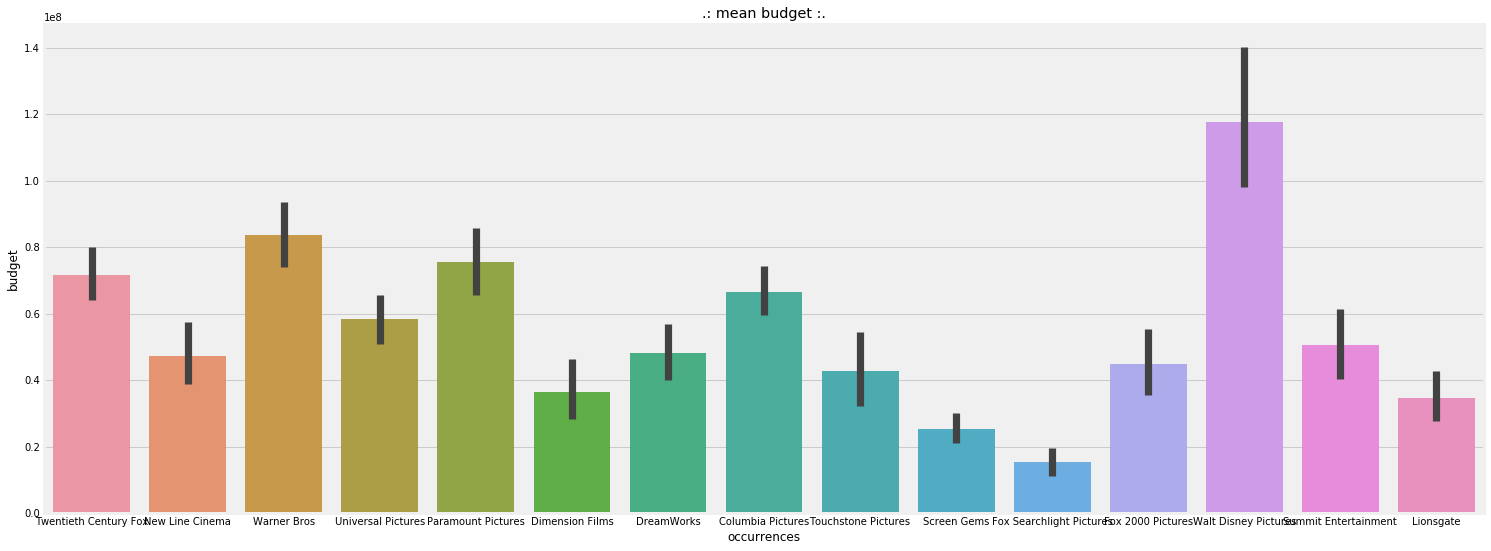

In [26]:
f, ax = plt.subplots(figsize=(23, 9))
prod_comp = eda_data[eda_data['fproduction'] != 'other']
production_comp = prod_comp.groupby('fproduction')
sns.barplot(x = 'fproduction', y = 'fbudget_y', data=prod_comp)
ax.set_title('.: mean budget :.')
ax.set_xlabel('occurrences')
ax.set_ylabel('budget')
plt.show()

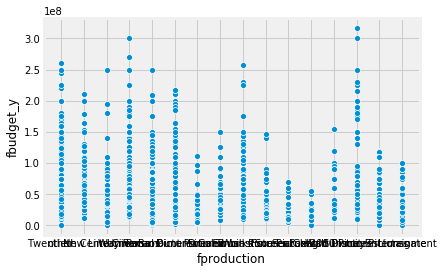

In [15]:
sns.scatterplot(x='fproduction',y='fbudget_y',data=eda_data)

### certificates

In [72]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = df.corr()
def magnify():
    
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [205]:
pwd

'/Users/bader/Dropbox/DSI_GA_Capstone/Code/Bader'

In [ ]:
DSI_GA_Capstone/Code/Bader/EDA_dataAnalysis